In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain # Pradeep Elance https://www.tutorialspoint.com/append-multiple-lists-at-once-in-python
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer

In [2]:
houses_train = pd.read_csv('./datasets/train.csv')
houses_test = pd.read_csv('./datasets/test.csv')

## Exploring the Data

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
houses_train.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


In [4]:
houses_train.describe()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,2050.000000,2050.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2049.000000,2049.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,1937.000000,2050.000000,2050.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,442.300488,47.959024,567.728293,1057.987805,1164.488055,329.329108,5.512921,1499.330083,0.427526,0.063446,1.577279,0.371039,2.843491,1.042906,6.435885,0.590931,1978.707796,1.776585,473.671707,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,461.204124,165.000901,444.954786,449.410704,396.446923,425.671046,51.068870,500.447829,0.522673,0.251705,0.549279,0.501043,0.826618,0.209790,1.560225,0.638516,25.441094,0.764537,215.934561,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,0.000000,0.000000,220.000000,793.000000,879.500000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,368.000000,0.000000,474.500000,994.500000,1093.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,733.750000,0.000000,811.000000,1318.750000,1405.000000,692.500000,0.000000,1728.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,1862.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1418.000000,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


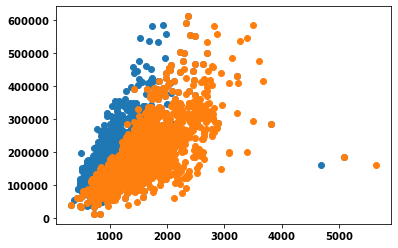

In [7]:
plt.scatter(houses_train['1st Flr SF'], houses_train['SalePrice']);
plt.scatter(houses_train['Gr Liv Area'], houses_train['SalePrice'])

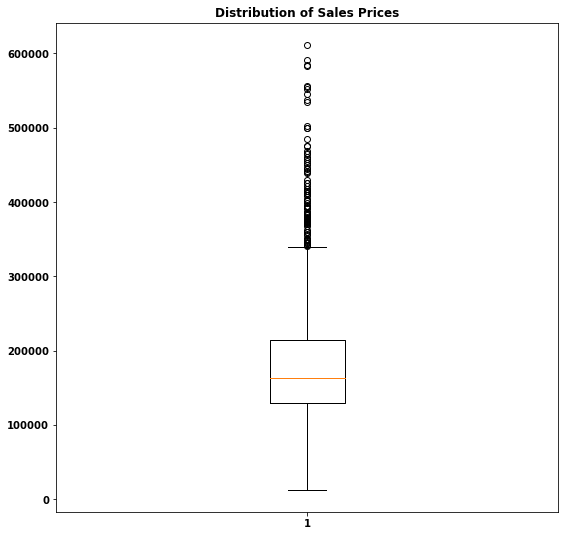

In [8]:
plt.figure(figsize=(9, 9))
plt.boxplot(houses_train['SalePrice'])
plt.title('Distribution of Sales Prices');

### Removing Outliers

In [10]:
def remove_outliers(data):
    return data[(data['1st Flr SF'] < 3000) &
               ((data)['Gr Liv Area'] < 3000)]

houses_train = remove_outliers(houses_train)

### Dropping columns with > 40% null values



### Imputing missing data with the mode (most missing data is categorical)

In [14]:
# Thanks Will Badr for this! https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779
def imp_data(data):
    imp_mean = SimpleImputer(strategy = 'mean')
    imp_mode = SimpleImputer(strategy = 'most_frequent')
    has_nulls = data.isnull().mean() != 0
    null_columns = data.columns[has_nulls]
    for column in null_columns:
        try:
            train = data[[column]]
            imp_mean.fit(train)
            data[column] = imp_mean.transform(train)
        except:
            train = data[[column]]
            imp_mode.fit(train)
            data[column] = imp_mode.transform(train)

In [15]:
imp_data(houses_train)

## Feature Engineering

### Mapping Ordinals

### Creating Dummies

In [20]:
def category_to_bool_cols(dataframe, list_of_columns):
    for column in list_of_columns:
        dummy_split = pd.get_dummies(dataframe[column], column, drop_first = True) # Creates dummy columns with the name {column}_{value_in_row} per get_dummies documentation
        for dummy_key in dummy_split: # Iterates through dummy_key in dummy_split
            dataframe[dummy_key] = dummy_split[dummy_key] # adds new columns named {dummy_key} to original dataframe

In [21]:
nominal_categories = ['MS Zoning',
                      'Foundation',
                      'BsmtFin Type 1',
                      'BsmtFin Type 2',
                      'Heating',
                      'Street',
                      'Full Bath',
                      'Neighborhood',
                      'Garage Finish',
                      'Lot Config',
                      'BsmtFin Type 1',
                      'BsmtFin Type 2',
                      'Lot Shape',
                      'Roof Matl',
                      'Roof Style',
                      'Lot Shape',
                      'Land Contour',
                      'Utilities',
                      'Land Slope',
                      'House Style',
                      'Electrical',
                      'Garage Type',
                      'Sale Type',
                      'Functional',
                      'Half Bath',
                      'Bedroom AbvGr',
                      'Kitchen AbvGr',
                      'TotRms AbvGrd',
                      'Exter Qual',
                        'Exter Cond',
                        'Bsmt Qual',
                        'Bsmt Cond',
                        'Heating QC',
                        'Kitchen Qual',
                        'Fireplace Qu',
                        'Garage Qual',
                        'Garage Cond',
                        'Pool QC',
                        'Overall Cond']
category_to_bool_cols(houses_train, nominal_categories)

In [23]:
# Creating my own polynomial features
def poly_features(data):
    data['gr_liv x 1st_SF'] = data['Gr Liv Area'] * data['1st Flr SF']
    data['Ovr Qual x 1st_SF'] = data['Overall Qual'] * data['1st Flr SF']
    data['Ovr Qual ^ 2'] = data['Overall Qual'] ** 2
    data['Average_bsmt_kitch_exter_qual'] = data['Bsmt Qual_TA'] * data['Kitchen Qual_TA'] * data['Exter Qual_TA']
    data['Avg_bsmt_kitch_qual'] = data['Bsmt Qual_TA'] * data['Kitchen Qual_TA']
    data['Avg_bsmt_exter_qual'] = data['Bsmt Qual_TA'] * data['Exter Qual_TA']

In [24]:
poly_features(houses_train)

In [26]:
houses_train.shape

(2034, 267)

In [27]:
# houses_10p_to_90p.shape

### Creating Logs

In [28]:
change_0_to_1 = lambda x: 1 if x <= 0 else x

In [29]:
def log_col(data, columns):
    for column in columns:
        temp_df = data[column].apply(change_0_to_1)
        data[f"log_{column.replace(' ', '_').lower()}"] = np.log(temp_df)

In [30]:
def log_hist(data, column):
    plt.hist(data[column].apply(change_0_to_1))

In [31]:
columns_to_log = ['BsmtFin SF 1', '1st Flr SF', 'Lot Area']
log_col(houses_train, columns_to_log)

In [32]:
# columns_to_log = ['BsmtFin SF 1', '1st Flr SF', 'Lot Area']
# log_col(houses_10p_to_90p, columns_to_log)
# # # log_col(houses_train, '2nd Flr SF')
# # # log_col(houses_train, 'Total Bsmt SF')
# # # for column in houses_train:
# # #     log_col(houses_train, column)

In [33]:
houses_train.shape

(2034, 270)

In [34]:
# houses_10p_to_90p.shape

### Choosing Features

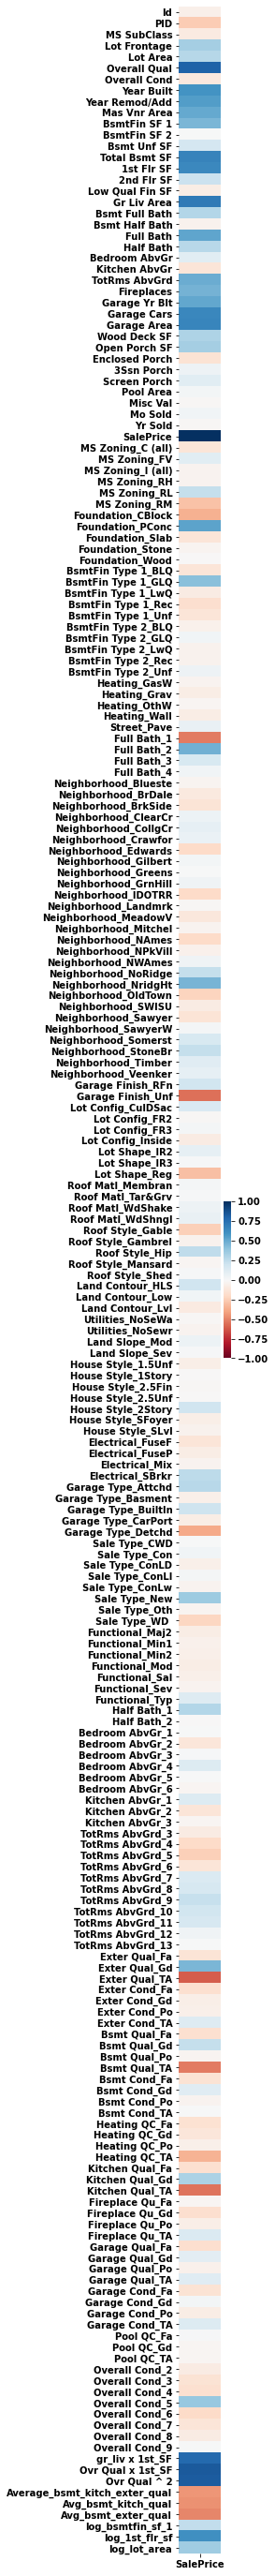

In [35]:
plt.figure(figsize=(1, 50))
sns.heatmap(houses_train.corr()[['SalePrice']], vmin=-1, vmax=1, cmap='RdBu');

In [208]:
def random_feature_thresh_test(data, target, threshold_start):
    best_threshold = 0
    best_score = float('inf')
    for i in range(0, 10):
        mean_corr = data.corr()[target].mean()
        feature_threshold = threshold_start + (i / 10)
        abs_value_greater_than_thresh = abs(data.corr()['SalePrice']) > mean_corr * feature_threshold
        # EdChum and dartdog from SO: https://stackoverflow.com/questions/29281815/pandas-select-dataframe-columns-using-boolean
        strong_corr_features = data[data.corr().columns[abs_value_greater_than_thresh]]

        features = list(strong_corr_features[1:])
        features_not_in_list = ['SalePrice', 'PID', 'Id'
                               ]
        features = [feature for feature in features if feature not in features_not_in_list]

        X = data[[col for col in features if col in houses_test]].drop(outlier_indices)
        y = data[target].drop(outlier_indices)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=342)

        lr = LinearRegression()
        lr.fit(X_train, y_train)

        y_pred = lr.predict(X_test)

        lr.score(X_test, y_test)
        score = metrics.mean_squared_error(y_test, y_pred, squared=False)
        if score < best_score:
            print(score)
            print("^^NEW HIGH SCORE^^")
            best_score = score
            best_threshold = feature_threshold
    return f'The best score was {best_score}, the best threshold was {best_threshold}.'
    

In [285]:
random_feature_thresh_test(houses_train, 'SalePrice', 0.5)

19350.034650180398
^^NEW HIGH SCORE^^
19130.49747697732
^^NEW HIGH SCORE^^


'The best score was 19130.49747697732, the best threshold was 0.6.'

In [110]:
def get_features(data, threshold):
    mean_corr = houses_train.corr()['SalePrice'].mean()
    abs_value_greater_than_thresh = abs(data.corr()['SalePrice']) > mean_corr * threshold
    # EdChum and dartdog from SO: https://stackoverflow.com/questions/29281815/pandas-select-dataframe-columns-using-boolean
    strong_corr_features = data[data.corr().columns[abs_value_greater_than_thresh]]

    features = list(strong_corr_features[1:])
    features_not_in_list = ['SalePrice', 'PID', 'Id']
    try:
        return [feature for feature in features if feature not in features_not_in_list]
    except:
        features_not_in_list = ['PID', 'Id']
        return [feature for feature in features if feature not in features_not_in_list]

In [300]:
features_all = get_features(houses_train, 1)
len(features_all)

159

## Prepping model for Kaggle Submission

In [301]:
# Garage Cars was type int64 in houses_test, was type float in houses_train_pol_scale
houses_test['Garage Cars'] = houses_test['Garage Cars'].apply(lambda x: float(x))

In [302]:
# Thanks Will Badr for this! https://towardsdatascience.com/6-different-ways-to-compensate-for-missing-values-data-imputation-with-examples-6022d9ca0779
imp_data(houses_test)

In [303]:
category_to_bool_cols(houses_test, nominal_categories)

In [304]:
poly_features(houses_test)

In [305]:
log_col(houses_test, columns_to_log)

In [306]:
houses_test.shape

(878, 257)

In [307]:
X_real_test = houses_test[[col for col in features_all if col in houses_test]]
X_real_test.shape

(878, 152)

## Testing!!

### Splitting the Data

In [308]:
outlier_indices = [1796, 125]
X_all = houses_train[[col for col in features_all if col in houses_test]].drop(outlier_indices)
y_all = houses_train['SalePrice'].drop(outlier_indices)
X_all.shape

(2032, 152)

In [309]:
X_all.fillna(0, inplace=True)

In [310]:
def get_cval_score_mse(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=342)
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    resids = y_test - y_pred
    print(f'The Cross Validation Score is: {cross_val_score(lr, X_train, y_train)}')
    print(f'The R2 score on testing data is: {lr.score(X_test, y_test)}')
    print(f'The MSE is {metrics.mean_squared_error(y_test, y_pred, squared=False)}')
    return X_train, X_test, y_train, y_test
    
    

In [311]:
X_train, X_test, y_train, y_test = get_cval_score_mse(X_all, y_all)

The Cross Validation Score is: [0.9107562  0.91699164 0.93227057 0.92646788 0.91948995]
The R2 score on testing data is: 0.9256230959213753
The MSE is 19358.891143189434


In [312]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [313]:
cross_val_score(lr, X_train, y_train)

array([0.9107562 , 0.91699164, 0.93227057, 0.92646788, 0.91948995])

In [314]:
y_pred = lr.predict(X_test)

In [315]:
lr.score(X_test, y_test)

0.9256230959213753

In [316]:
metrics.mean_squared_error(y_test, y_pred, squared=False)

19358.891143189434

In [317]:
resids = y_test - y_pred

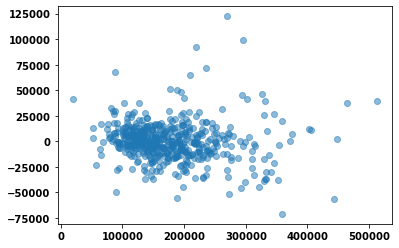

In [318]:
plt.scatter(y_pred, resids, alpha=0.5)

In [319]:
X_all.shape

(2032, 152)

## Training model on all data

In [320]:
lr.fit(X_all, y_all)

LinearRegression()

In [321]:
len(lr.predict(X_real_test))

878

In [322]:
len(X_real_test)

878

In [323]:
houses_test['SalePrice'] = lr.predict(X_real_test)

submission = houses_test[['Id', 'SalePrice']]
submission[submission['SalePrice'] < 0]
submission.describe()

,Id,SalePrice
count,878.000000,878.000000
mean,1444.749431,179284.605363
std,850.838263,76843.960653
min,2.000000,-406.499865
25%,692.250000,127529.908169
50%,1433.000000,161584.741772
75%,2197.500000,214049.928110
max,2928.000000,627625.007919


In [324]:
submission.to_csv('./submissions/test37.csv', index=False)